In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
# Read dataset
df = pd.read_csv('./data/AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [17]:
train = df[:'2016'].iloc[:,1:2]
test = df['2017'].iloc[:,1:2]

/tmp/ipykernel_22974/631395651.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017'].iloc[:,1:2]


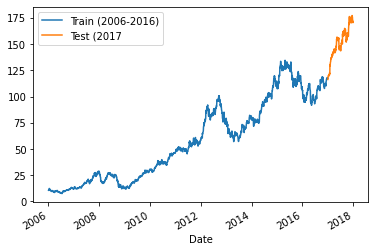

In [18]:
train['High'].plot(legend=True)
test['High'].plot(legend=True)
plt.legend(['Train (2006-2016)', 'Test (2017'])
plt.show()

In [19]:
sc = MinMaxScaler(feature_range=(0, 1))
train_scaler = sc.fit_transform(train)

In [20]:
steps = 60
X_train = []
Y_train = []
size = len(train_scaler)

In [21]:
for i in range(steps, size):
    X_train.append(train_scaler[i - steps:i, 0])
    Y_train.append(train_scaler[i, 0])

In [22]:
X_train = np.array(X_train)
X_train.shape

(2708, 60)

In [23]:
Y_train = np.array(Y_train)
Y_train.shape

(2708,)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2708, 60, 1)

In [31]:
dim_input = (X_train.shape[1], 1)
dim_output = 1
na = 50

In [32]:
model = Sequential()
model.add(LSTM(units=na, input_shape=dim_input))
model.add(Dense(units=dim_output))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train, Y_train, epochs=20, batch_size=32)


2022-07-18 20:47:04.969971: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-18 20:47:04.970271: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-18 20:47:04.970469: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-H0LOU2C): /proc/driver/nvidia/version does not exist


Epoch 1/20
85/85 [==============================] - 12s 85ms/step - loss: 0.0101
Epoch 2/20
85/85 [==============================] - 7s 86ms/step - loss: 0.0012
Epoch 3/20
85/85 [==============================] - 8s 93ms/step - loss: 8.3107e-04
Epoch 4/20
85/85 [==============================] - 7s 80ms/step - loss: 6.0509e-04
Epoch 5/20
85/85 [==============================] - 7s 82ms/step - loss: 5.0126e-04
Epoch 6/20
85/85 [==============================] - 8s 98ms/step - loss: 4.9192e-04
Epoch 7/20
85/85 [==============================] - 7s 77ms/step - loss: 3.5158e-04
Epoch 8/20
85/85 [==============================] - 7s 80ms/step - loss: 3.8532e-04
Epoch 9/20
85/85 [==============================] - 7s 80ms/step - loss: 3.2301e-04
Epoch 10/20
85/85 [==============================] - 6s 76ms/step - loss: 3.2670e-04
Epoch 11/20
85/85 [==============================] - 7s 80ms/step - loss: 2.8996e-04
Epoch 12/20
85/85 [==============================] - 8s 96ms/step - loss: 2.5826e

In [38]:
def plot_prediction(real, prediction):
    plt.plot(real[0:len(prediction)], color='red', label='Real_Value_AAPL')
    plt.plot(prediction, color='blue', label='Prediction_Value_AAPL')
    plt.ylim(1.1 * np.min(prediction)/2, 1.1 * np.max(prediction))
    plt.xlabel('Time')
    plt.ylabel('Stock value')
    plt.legend()
    plt.show()

In [27]:
x_test = test.values
x_test = sc.transform(x_test)

/home/jota/projects/ml-course/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [28]:
X_test = []
for i in range(steps, len(x_test)):
    X_test.append(x_test[i-steps:i, 0])

In [33]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [39]:
prediction = model.predict(X_test)

6/6 [==============================] - 0s 56ms/step


In [40]:
prediction = sc.inverse_transform(prediction)
prediction

array([[143.89735],
       [144.15993],
       [143.81142],
       [143.5229 ],
       [144.00676],
       [144.75375],
       [144.4298 ],
       [143.77977],
       [143.33157],
       [142.92903],
       [142.02702],
       [141.69736],
       [141.41658],
       [141.3799 ],
       [141.36644],
       [141.9112 ],
       [142.08012],
       [142.80775],
       [143.82594],
       [144.055  ],
       [143.64603],
       [143.4947 ],
       [145.42099],
       [147.20297],
       [147.26695],
       [146.59644],
       [147.47682],
       [151.29758],
       [154.04536],
       [153.86661],
       [153.16335],
       [154.55931],
       [155.85223],
       [155.75224],
       [154.346  ],
       [152.82463],
       [152.78499],
       [153.52394],
       [154.01169],
       [153.49196],
       [153.12802],
       [153.02701],
       [153.17987],
       [153.09467],
       [152.42775],
       [153.40747],
       [153.5545 ],
       [154.15538],
       [154.60446],
       [154.42458],


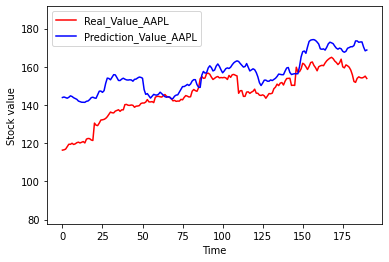

In [41]:
plot_prediction(test.values, prediction)